In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import itertools as it
import operator as op

## NumPy Examples

### Array Creation

In [2]:
# array creation by sequence
A = np.array([[1,2,3],[4,5,6]])
print("This is array A",A)

This is array A [[1 2 3]
 [4 5 6]]


In [3]:
# pre-format arrays with zeros/ones
A = np.zeros((2,3))
B = np.ones(5) 
C = np.zeros(shape=(100,100), dtype=float)
D = np.ones((2,2),dtype=np.int16)
E = np.empty((2,2))
print("This is array A",A,"and array B",B)
print("This is array C",C)
print("This is array D",D)
print("This is array E",E)

This is array A [[0. 0. 0.]
 [0. 0. 0.]] and array B [1. 1. 1. 1. 1.]
This is array C [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
This is array D [[1 1]
 [1 1]]
This is array E [[4.9e-324 1.5e-323]
 [1.5e-323 4.9e-324]]


In [4]:
# creation through ranges 
A = np.arange(2,10,2) # array from 2 to 10 with steps of 2
B = np.linspace(0,4.5,10) # array from 0 to 4.5 at steps of 0.5
print("This is array A",A,"and B",B)

This is array A [2 4 6 8] and B [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [5]:
# from random source 
A = np.random.rand(1,2)
B = 2 * np.random.randn(1,2) + 10 # mu = 10, sigma = 2 
print(A,B)

[[0.12163798 0.65586914]] [[10.82295276 12.28861578]]


In [6]:
# arrays have attributes that can be printed to have informations that are needed
print(A.ndim, A.shape, A.size, A.dtype, A.itemsize, A.data)

2 (1, 2) 2 float64 8 <memory at 0x7f3419423c60>


### Manipulation of arrays

In [7]:
# reshape array
A = np.arange(12).reshape(4,3) # reshape an array of 12 elements arranged in 3 columns and 4 rows
print(A)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
# A is an array of 10 elements, by doing A[2,5] a sub-array is given with only elements between 2 and 5
A = np.arange(10)
A[2:5]  

array([2, 3, 4])

In [9]:
# A is an array of 9 elements, ordered in 3 columns and 3 rowe. 
A = np.arange(9).reshape(3,3)
A, A[1], A[:,1] # A gives the whole 3x3 matrix, A[1] gives only the row 1 of the matrix, A[:,1] gives only column 1 of the matrix

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([3, 4, 5]),
 array([1, 4, 7]))

In [10]:
# for loop over A. Each element of the matrix A is squared
for i in A: 
    print (i**2)

[0 1 4]
[ 9 16 25]
[36 49 64]


In [11]:
# Alternative way to loop over A and square each element of the matrix
[i**2 for i in A]

[array([0, 1, 4]), array([ 9, 16, 25]), array([36, 49, 64])]

In [12]:
# Flat: Return a copy of the array collapsed into one dimension.
[i**2 for i in A.flat]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

In [13]:
# reshaping
A = np.floor(10*np.random.random((3,4)))
print(A, A.shape)
print(A.ravel()) # flatten array
print(A.reshape(6,2)) 
print(A.T, A.T.shape)

[[4. 1. 4. 5.]
 [8. 4. 1. 3.]
 [9. 5. 7. 7.]] (3, 4)
[4. 1. 4. 5. 8. 4. 1. 3. 9. 5. 7. 7.]
[[4. 1.]
 [4. 5.]
 [8. 4.]
 [1. 3.]
 [9. 5.]
 [7. 7.]]
[[4. 8. 9.]
 [1. 4. 5.]
 [4. 1. 7.]
 [5. 3. 7.]] (4, 3)


In [14]:
# use resize to reshape in place
B = A 
A.resize(2,6)
print(A)
B.reshape(3,-1) # -1 calc cols automatically
print(B)

[[4. 1. 4. 5. 8. 4.]
 [1. 3. 9. 5. 7. 7.]]
[[4. 1. 4. 5. 8. 4.]
 [1. 3. 9. 5. 7. 7.]]


In [15]:
# stacking
A = np.floor(10*np.random.random((3,4)))
B = np.floor(10*np.random.random((3,4)))
print(A)
print(B)
C = np.vstack((A,B))
print(C)
D = np.hstack((A,B))
print(D)

[[2. 9. 2. 9.]
 [4. 5. 1. 2.]
 [3. 0. 8. 6.]]
[[6. 7. 0. 3.]
 [3. 8. 1. 5.]
 [2. 8. 0. 6.]]
[[2. 9. 2. 9.]
 [4. 5. 1. 2.]
 [3. 0. 8. 6.]
 [6. 7. 0. 3.]
 [3. 8. 1. 5.]
 [2. 8. 0. 6.]]
[[2. 9. 2. 9. 6. 7. 0. 3.]
 [4. 5. 1. 2. 3. 8. 1. 5.]
 [3. 0. 8. 6. 2. 8. 0. 6.]]


In [16]:
# splitting
A = np.floor(10*np.random.random((2,12)))
print("A", A)
B, C, D = np.hsplit(A,3)
print("B", B)
print("C", C)
print("D", D)
E, F, G = np.hsplit(A,(3,4)) # split A after col 3 and col 4
print("E", E)
print("F", F)
print("G", G)

A [[4. 9. 8. 5. 4. 2. 4. 9. 5. 5. 1. 8.]
 [9. 9. 7. 4. 0. 9. 1. 9. 4. 3. 7. 7.]]
B [[4. 9. 8. 5.]
 [9. 9. 7. 4.]]
C [[4. 2. 4. 9.]
 [0. 9. 1. 9.]]
D [[5. 5. 1. 8.]
 [4. 3. 7. 7.]]
E [[4. 9. 8.]
 [9. 9. 7.]]
F [[5.]
 [4.]]
G [[4. 2. 4. 9. 5. 5. 1. 8.]
 [0. 9. 1. 9. 4. 3. 7. 7.]]


In [17]:
a = [1, 2, 3, 4]  # list like object
b = ['a', 'b', 'c', 'd']  # another list like object
c = zip(a, b)  # a generator which will 'merge' 2 list-like objects into a list of pairs
list(c)  # lets look at the output

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

### Logic check

In [18]:
# logic check: Check if the elements of the matrix A (above) are greater of 2 or not and return False or True.
A > 2

array([[ True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True],
       [ True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True]])

### Sort

In [19]:
# sort
a = np.floor(10*np.random.random((2,6)))
print(a)
# sort - row wise
b = np.sort(a)
print(b)

[[0. 7. 4. 2. 0. 9.]
 [2. 5. 2. 1. 2. 5.]]
[[0. 0. 2. 4. 7. 9.]
 [1. 2. 2. 2. 5. 5.]]


In [20]:
# sort - col wise
c = np.sort(a, axis=0)
print(c)

[[0. 5. 2. 1. 0. 5.]
 [2. 7. 4. 2. 2. 9.]]


In [21]:
# sort flatten
d = np.sort(a, axis=None)
print(d)

[0. 0. 1. 2. 2. 2. 2. 4. 5. 5. 7. 9.]


### Operations

In [22]:
# element wise add 
B = A
C = A + B
print(C)

[[ 8. 18. 16. 10.  8.  4.  8. 18. 10. 10.  2. 16.]
 [18. 18. 14.  8.  0. 18.  2. 18.  8.  6. 14. 14.]]


In [23]:
# element wise mult
C = A * 4
print(C)

[[16. 36. 32. 20. 16.  8. 16. 36. 20. 20.  4. 32.]
 [36. 36. 28. 16.  0. 36.  4. 36. 16. 12. 28. 28.]]


In [24]:
# element wise f()
def f(x):
    return 3*x**2 - 2*x + 7
f(A)

array([[ 47., 232., 183.,  72.,  47.,  15.,  47., 232.,  72.,  72.,   8.,
        183.],
       [232., 232., 140.,  47.,   7., 232.,   8., 232.,  47.,  28., 140.,
        140.]])

In [25]:
# function apply on linspace
x = np.linspace(0, 2*3.14, 10)
f = np.sin(x)
f

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012,
       -0.34035671, -0.86496168, -0.98523494, -0.644954  , -0.0031853 ])

In [26]:
# inplace 
A *= 2
print(A)

[[ 8. 18. 16. 10.  8.  4.  8. 18. 10. 10.  2. 16.]
 [18. 18. 14.  8.  0. 18.  2. 18.  8.  6. 14. 14.]]


In [27]:
# sums along axis
print(A)
print(A.sum(axis=0)) # sum col
print(A.sum(axis=1)) # sum row
print(A.cumsum(axis=1)) # cumulative sum row

[[ 8. 18. 16. 10.  8.  4.  8. 18. 10. 10.  2. 16.]
 [18. 18. 14.  8.  0. 18.  2. 18.  8.  6. 14. 14.]]
[26. 36. 30. 18.  8. 22. 10. 36. 18. 16. 16. 30.]
[128. 138.]
[[  8.  26.  42.  52.  60.  64.  72.  90. 100. 110. 112. 128.]
 [ 18.  36.  50.  58.  58.  76.  78.  96. 104. 110. 124. 138.]]


In [28]:
# broadcast row vector on all rows
A = np.ones((5,5))
B = A + [1, 2, 3, 4, 5]
B

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

In [29]:
# universial functions 
print(np.exp(A))
print(np.sqrt(A))

[[2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### Basic Statistics

In [30]:
# stats properties
A = np.arange(9).reshape(3,3)
print(A.sum(), A.min(), A.max())

36 0 8


In [31]:
# time example
time = np.linspace(20, 145, 5)
data = np.sin(np.arange(20)).reshape(5,4) 
print(time)
print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [32]:
ind = data.argmax(axis=0) # get max index for each series (col)
time_max = time[ind] # times corresponding to maxima
print(ind)
print(time_max)

[2 0 3 1]
[ 82.5   20.   113.75  51.25]


### Basic Linear Algebra

In [33]:
# matrix product
A = B
A @ B

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [34]:
# matrix product alt 
A.dot(B)

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [35]:
# matrix
m = np.matrix([[1,-2,3],[0,4,5],[7,8,-9]])
v = np.matrix([[2],[3],[4]])

In [36]:
# transpose
m.T

matrix([[ 1,  0,  7],
        [-2,  4,  8],
        [ 3,  5, -9]])

In [37]:
# inverse
m.I

matrix([[ 0.33043478, -0.02608696,  0.09565217],
        [-0.15217391,  0.13043478,  0.02173913],
        [ 0.12173913,  0.09565217, -0.0173913 ]])

In [38]:
# multiply 
m * v

matrix([[ 8],
        [32],
        [ 2]])

In [39]:
# determinant 
np.linalg.det(m)

-229.99999999999983

In [40]:
# eigenvalues
np.linalg.eigvals(m)

array([-13.11474312,   2.75956154,   6.35518158])

In [41]:
# Solve for x in mx = v
np.linalg.solve(m, v)

matrix([[0.96521739],
        [0.17391304],
        [0.46086957]])

## Pandas Examples

### Create

In [42]:
# DF from dictionary 
ex1 = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(ex1)
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [43]:
ex2 = {'one' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'two' : pd.Series([1., 2., 3.], index=['a', 'b', 'c'])}
df2 = pd.DataFrame(ex2)
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,NaN


In [44]:
# define DF from random numbers 
dfr1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr2 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr1.astype('int32').dtypes

A    int32
B    int32
C    int32
D    int32
dtype: object

In [45]:
# multi-index frame (dict of tuples)
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### Combining

In [46]:
# simple addition
# define variables and target 
variables = ['A','B']
target   = ['D']


# combine variables and target to create a smaller dataset of dfr1 (without C column)
dfsum = dfr1[variables+target]



# Shuffle dataset
dfsum = dfsum.sample(frac=1).reset_index(drop=True)

# Get first 2 observations of dfsum columns == 0
df_frame = [dfsum[dfsum.A == 0].head(2),
            dfsum[dfsum.B == 0].head(2)]
# concat the df_frame in a new dataset df_sample
df_sample = pd.concat(df_frame)
df_sample

,A,B,D


In [47]:
# addition with 2 different DFs
dfSum2 = df1 + df2
dfSum2

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [48]:
# operations automatically align the data based on label
df1[1:] + df1[:-1]

,one,two
a,NaN,NaN
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [49]:
# create new column from existing columns
df3 = df1
df3['three'] = df3['one'] * df3['two']
df3

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [50]:
# append boolean column based on conditional 
df3['flag'] = df3['one'] > 2
df3

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [51]:
# append scalar
df3['five'] = 6.
df3

,one,two,three,flag,five
a,1.0,1.0,1.0,False,6.0
b,2.0,2.0,4.0,False,6.0
c,3.0,3.0,9.0,True,6.0
d,NaN,4.0,NaN,False,6.0


In [52]:
# append random series 
df3['random'] = pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd'])
df3

,one,two,three,flag,five,random
a,1.0,1.0,1.0,False,6.0,1.288257
b,2.0,2.0,4.0,False,6.0,0.213350
c,3.0,3.0,9.0,True,6.0,-0.533301
d,NaN,4.0,NaN,False,6.0,-1.113254


In [53]:
# append using assign from precomputing values (not persistent)
df3.assign(ratio = (df3.one / df3.random))

,one,two,three,flag,five,random,ratio
a,1.0,1.0,1.0,False,6.0,1.288257,0.776243
b,2.0,2.0,4.0,False,6.0,0.213350,9.374281
c,3.0,3.0,9.0,True,6.0,-0.533301,-5.625340
d,NaN,4.0,NaN,False,6.0,-1.113254,NaN


In [54]:
# assign with lambda (not persistent)
df3.assign(ratio_two = lambda x: (x.two / x.random))

,one,two,three,flag,five,random,ratio_two
a,1.0,1.0,1.0,False,6.0,1.288257,0.776243
b,2.0,2.0,4.0,False,6.0,0.213350,9.374281
c,3.0,3.0,9.0,True,6.0,-0.533301,-5.625340
d,NaN,4.0,NaN,False,6.0,-1.113254,-3.593072


In [55]:
# subtract all columns by first column - broadcasting column wise
df3.sub(df3['one'], axis=0)

,one,two,three,flag,five,random
a,0.0,0.0,0.0,-1.0,5.0,0.288257
b,0.0,0.0,2.0,-2.0,4.0,-1.786650
c,0.0,0.0,6.0,-2.0,3.0,-3.533301
d,NaN,NaN,NaN,NaN,NaN,NaN


### Resizing and Reshaping

In [56]:
# pop column (can only run once in notebook)
flag = df3.pop('three')
flag

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [57]:
# transpose column names - get first 5 columns
dfr1[:5].T

,0,1,2,3,4
A,0.280537,-1.106026,0.332363,0.602773,0.648385
B,0.792402,0.262319,-0.981259,-1.812806,-0.316635
C,0.361963,0.393829,-2.499562,-0.889853,-0.110514
D,-0.676216,-0.211578,-1.324526,-1.551528,-1.254995


In [58]:
# transform into numpy array 
np.asarray(dfr1)

array([[ 0.28053707,  0.79240211,  0.36196281, -0.67621592],
       [-1.10602557,  0.26231928,  0.39382864, -0.21157836],
       [ 0.33236266, -0.98125862, -2.49956216, -1.32452601],
       [ 0.60277312, -1.8128064 , -0.88985289, -1.55152823],
       [ 0.6483848 , -0.3166352 , -0.11051371, -1.25499541],
       [-0.69089559, -0.69604214,  1.199742  ,  0.86979423],
       [ 2.31895412, -1.39888948,  0.73075868, -1.34240635],
       [-0.71528512, -0.05004213,  0.15769757,  1.20233498],
       [ 0.95058665,  2.67580015,  0.0181687 , -0.58906382],
       [ 0.67962139, -0.91293674,  0.25478988,  1.13613087]])

### Filtering

In [59]:
# boolean compare elementwise
dfr1.gt(1)

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,False,False,True


In [60]:
# boolean compare two DFs
dfr1.gt(dfr2)

,A,B,C,D
0,False,True,True,False
1,False,True,False,False
2,True,False,False,False
3,False,False,False,False
4,True,False,True,False
5,True,False,True,False
6,True,False,False,False
7,True,False,True,True
8,True,True,False,False
9,True,False,True,False


In [61]:
# boolean column reductions
(dfr1 > 1).all()

A    False
B    False
C    False
D    False
dtype: bool

In [62]:
(dfr1 > 1).any()

A    True
B    True
C    True
D    True
dtype: bool

In [63]:
# same does not work 
# TODO - what do (1) mean?
dfr1.sub(dfr1.mean(1), axis=0).div(dfr1.std(1), axis=0)

,A,B,C,D
0,0.146698,0.973081,0.278156,-1.397935
1,-1.385630,0.629994,0.823712,-0.068076
2,1.244861,0.117558,-1.185396,-0.177022
3,1.400106,-0.831359,0.021248,-0.589995
4,1.157683,-0.074294,0.188848,-1.272237
5,-0.855683,-0.860794,1.022090,0.694387
6,1.250194,-0.823105,0.364518,-0.791607
7,-1.086709,-0.249952,0.011347,1.325314
8,0.131189,1.343362,-0.523948,-0.950603
9,0.444117,-1.368404,-0.039392,0.963679


In [64]:
# use apply to get mean on rows
dfr1.apply(np.mean, axis=1)

0    0.189672
1   -0.165364
2   -1.118246
3   -0.912854
4   -0.258440
5    0.170650
6    0.077104
7    0.148676
8    0.763873
9    0.289401
dtype: float64

In [65]:
# get diff min and max on columns
dfr1.apply(lambda x: x.max() - x.min())

A    3.424980
B    4.488607
C    3.699304
D    2.753863
dtype: float64

In [66]:
# get row with max value on columns
dfr1.apply(lambda x: x.idxmax())

A    6
B    8
C    5
D    7
dtype: int64

In [67]:
# apply custom function
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide
dfr1.apply(subtract_and_divide, args=(5,), divide=3)

,A,B,C,D
0,-1.573154,-1.402533,-1.546012,-1.892072
1,-2.035342,-1.579227,-1.535390,-1.737193
2,-1.555879,-1.993753,-2.499854,-2.108175
3,-1.465742,-2.270935,-1.963284,-2.183843
4,-1.450538,-1.772212,-1.703505,-2.084998
5,-1.896965,-1.898681,-1.266753,-1.376735
6,-0.893682,-2.132963,-1.423080,-2.114135
7,-1.905095,-1.683347,-1.614101,-1.265888
8,-1.349804,-0.774733,-1.660610,-1.863021
9,-1.440126,-1.970979,-1.581737,-1.287956


In [68]:
dfr1.agg(np.sum)

/tmp/ipykernel_538009/3110357080.py:1: FutureWarning: The provided callable <function sum at 0x7f3431795940> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  dfr1.agg(np.sum)


A    3.301014
B   -2.438089
C   -0.382980
D   -3.742054
dtype: float64

In [69]:
# aggegrate - general form of sum(), here map functions to columns
def mymean(x):
    return x.mean()
dfr1.agg({'A': 'sum', 'B': mymean})

A    3.301014
B   -0.243809
dtype: float64

In [70]:
# Transform - convert to absolute
dfr1.transform(np.abs)

,A,B,C,D
0,0.280537,0.792402,0.361963,0.676216
1,1.106026,0.262319,0.393829,0.211578
2,0.332363,0.981259,2.499562,1.324526
3,0.602773,1.812806,0.889853,1.551528
4,0.648385,0.316635,0.110514,1.254995
5,0.690896,0.696042,1.199742,0.869794
6,2.318954,1.398889,0.730759,1.342406
7,0.715285,0.050042,0.157698,1.202335
8,0.950587,2.675800,0.018169,0.589064
9,0.679621,0.912937,0.254790,1.136131


In [71]:
# and for series
dfr1.A.transform(np.abs)

0    0.280537
1    1.106026
2    0.332363
3    0.602773
4    0.648385
5    0.690896
6    2.318954
7    0.715285
8    0.950587
9    0.679621
Name: A, dtype: float64

In [72]:
# map()
f = lambda x: x+100
dfr1.A.map(f)
dfr1.applymap(f)

/tmp/ipykernel_538009/4082927598.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfr1.applymap(f)


,A,B,C,D
0,100.280537,100.792402,100.361963,99.323784
1,98.893974,100.262319,100.393829,99.788422
2,100.332363,99.018741,97.500438,98.675474
3,100.602773,98.187194,99.110147,98.448472
4,100.648385,99.683365,99.889486,98.745005
5,99.309104,99.303958,101.199742,100.869794
6,102.318954,98.601111,100.730759,98.657594
7,99.284715,99.949958,100.157698,101.202335
8,100.950587,102.675800,100.018169,99.410936
9,100.679621,99.087063,100.254790,101.136131


## Matplotlib Examples

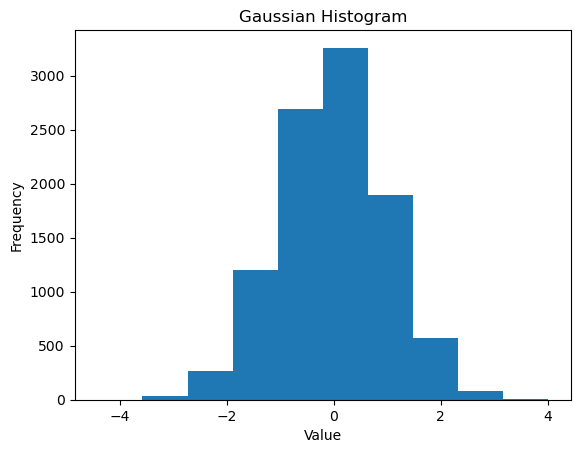

In [73]:
# normal distribution histogram
gaussian_numbers = np.random.randn(10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

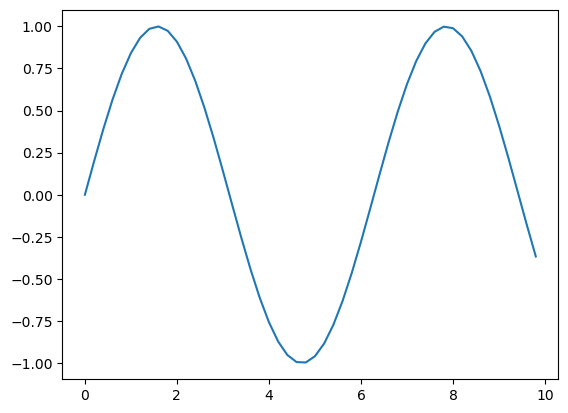

In [74]:
# line plot 
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

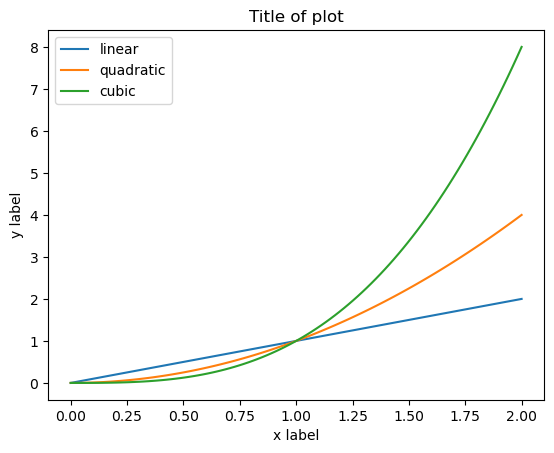

In [75]:
# Multiple plots
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Title of plot")

plt.legend()
plt.show()

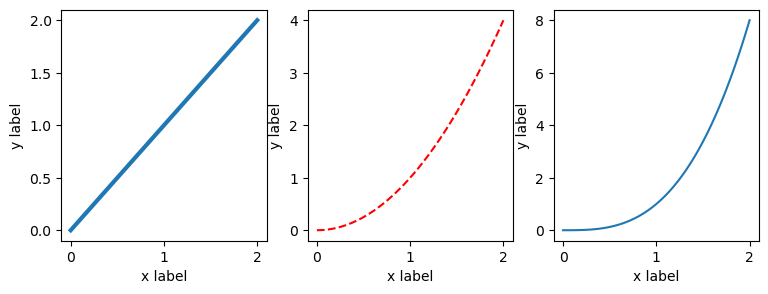

In [76]:
x = np.linspace(0, 2, 100)

plt.figure(1, figsize=(9, 3)) 

plt.subplot(131)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x, label='linear', linewidth=3)

plt.subplot(132)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**2, 'r--', label='quadratic')

plt.subplot(133)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**3, label='cubic')

plt.show()

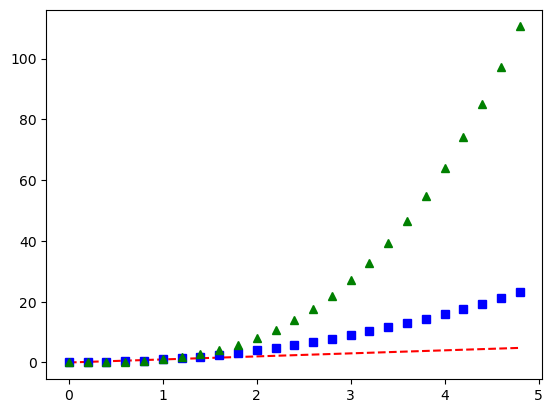

In [77]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Itertools Examples

In [78]:
fruit = ['apple', 'banana', 'pear', 'grapefruit', 'orange']
list(it.combinations(fruit, 2))

[('apple', 'banana'),
 ('apple', 'pear'),
 ('apple', 'grapefruit'),
 ('apple', 'orange'),
 ('banana', 'pear'),
 ('banana', 'grapefruit'),
 ('banana', 'orange'),
 ('pear', 'grapefruit'),
 ('pear', 'orange'),
 ('grapefruit', 'orange')]

In [79]:
x = [1, 2, 3]
y = ['a', 'b', 'c']
list(zip(x, y))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [80]:
x = [1, 2, 3, 4, 5]
y = ['a', 'b', 'c']
list(it.zip_longest(x, y))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, None), (5, None)]

In [81]:
a = [1, 2, 3]
b = [4, 5, 6]
list(map(op.mul, a, b))

[4, 10, 18]

In [82]:
cycle_ = it.cycle(["Hi", "low"])
[next(cycle_) for _ in range(5)]

['Hi', 'low', 'Hi', 'low', 'Hi']

In [83]:
a = [5, 6, 7]
b = [8, 9, 10]
list(it.product(a, b))

[(5, 8), (5, 9), (5, 10), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10)]

In [84]:
letters = 'abcde'
print(list(it.permutations(letters, 2)))
print('')
numbers = range(5)
print(list(it.permutations(numbers, 2)))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'a'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('d', 'a'), ('d', 'b'), ('d', 'c'), ('d', 'e'), ('e', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd')]

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]


In [85]:
x = list(range(6))
print(x)
list(it.accumulate(x))

[0, 1, 2, 3, 4, 5]


[0, 1, 3, 6, 10, 15]